<a href="https://colab.research.google.com/github/tntnu/Titanic/blob/main/%5B%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EC%97%B0%EC%8A%B5%5D_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EC%83%9D%EC%A1%B4%EC%9E%90%EC%98%88%EC%B8%A1_2%EC%B0%A8%EC%A0%9C%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Î≥¥ÌÜµ Í≤ΩÏßÑÎåÄÌöåÏóêÏÑúÎäî train dataÏôÄ test dataÎ•º ÎÇòÎà†ÏÑú Ï£ºÍ∏∞ ÎïåÎ¨∏Ïóê train_test_splitÏùÄ train dataÎ•º train data/valid dataÎ°ú ÎÇòÎàå Îïå ÏÇ¨Ïö©Îê©ÎãàÎã§.

In [ ]:
from sklearn.model_selection import train_test_split

# Ï¢ÖÏÜçÎ≥ÄÏàò(target)Ïùò Ïª¨ÎüºÏùÑ targetÏúºÎ°úÏùò ÏÑ†Ïñ∏Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§.
target = train['target']

# train dataÎ•º 8:2Î°ú train dataÏôÄ valid dataÎ°ú Î∂ÑÎ¶¨
x_train, x_valid, y_train, y_valid = train_test_split(train, target,
                                                      test_size=0.2,
                                                      random_state=83,
                                                      shuffle=True,
                                                      stratify=target)

In [2]:
from google.colab import files
uploaded_file = files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [3]:
from google.colab import files
uploaded_file = files.upload()

Saving Titanic_test.csv to Titanic_test.csv


# ***1. Exploratory data analysis***

## **1.1 Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ**

In [4]:
import numpy as np
import pandas as pd

train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

In [5]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [7]:
# train, test Îç∞Ïù¥ÌÑ∞ shape ÌôïÏù∏
print("train Îç∞Ïù¥ÌÑ∞ shape : ", train.shape)
print("test Îç∞Ïù¥ÌÑ∞ shape : ", test.shape)

# raw data ÎèÖÎ¶ΩÎ≥ÄÏàò 11Í∞ú

train Îç∞Ïù¥ÌÑ∞ shape :  (891, 12)
test Îç∞Ïù¥ÌÑ∞ shape :  (418, 11)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
# train data Í≤∞Ï∏°Ïπò ÌôïÏù∏
train.isnull().sum()

# Cabin Í≤∞Ï∏°ÏπòÏùò Í∞úÏàòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏúºÎØÄÎ°ú Î≥ÄÏàò Ï†úÍ±∞

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# test data Í≤∞Ï∏°Ïπò ÌôïÏù∏
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## **1.2 Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî**

### **Bar chart for categorical features**
* Pclass
* Sex
* SibSp
* Parch
* Embarked
* Cabin

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [13]:
def bar_chart(feature) :
  survived = train[train['Survived'] == 1][feature].value_counts()
  dead = train[train['Survived'] == 0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived', 'Dead']
  df.plot(kind = 'bar', stacked = True, figsize = (10, 5)) # stacked=True ‚Üí ÎàÑÏ†Å ÎßâÎåÄ Í∑∏ÎûòÌîÑ

#### **1.2.1 Sex**

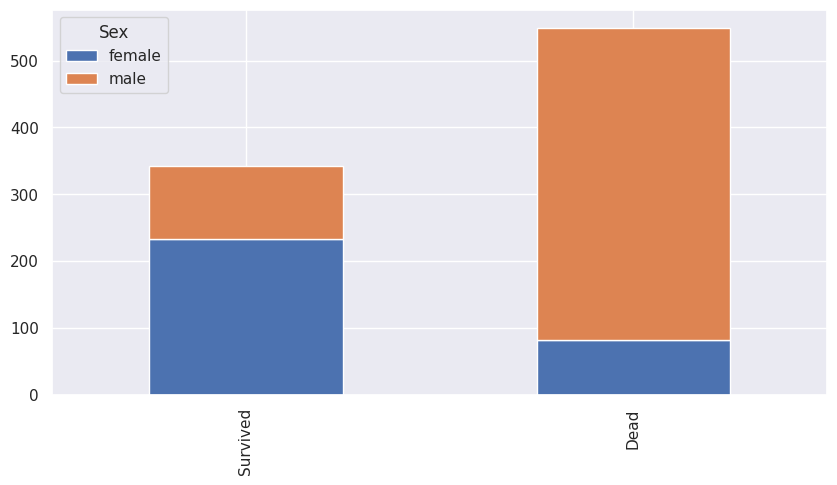

In [14]:
bar_chart('Sex')

* female ÏÉùÏ°¥Î•† : 0.742038
* male ÏÉùÏ°¥Î•† :	0.188908


In [15]:
# 1. ÏÑ±Î≥Ñ ÏÉùÏ°¥Î•† Í≥ÑÏÇ∞
female_survival_rate = train.groupby('Sex')['Survived'].mean()
female_survival_rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

#### 1.2.2 Pclass

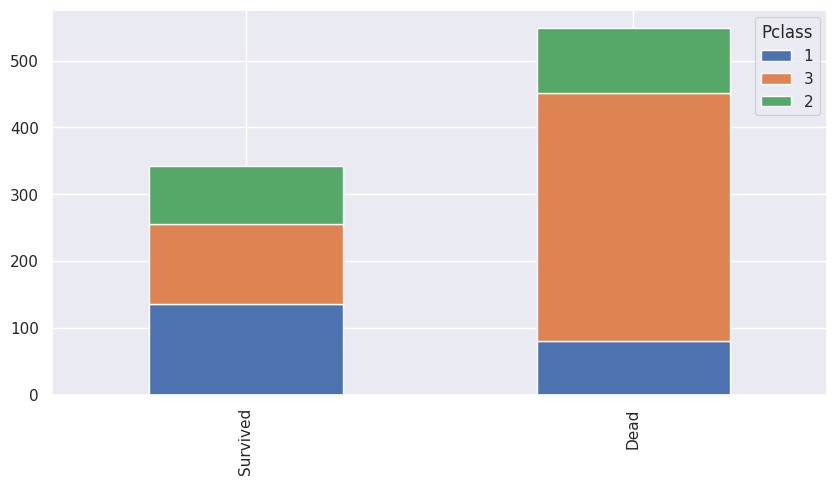

In [16]:
bar_chart('Pclass')
# Pclass = 3Ïù∏ Í≤ΩÏö∞ ÏÇ¨ÎßùÏûêÍ∞Ä ÎßéÏùå

In [17]:
pclass_survival_rate = train.groupby('Pclass')['Survived'].mean()
pclass_survival_rate
# Pclass = 1Ïù∏ Í≤ΩÏö∞ ÏÉùÏ°¥Î•†Ïù¥ Í∞ÄÏû• ÎÜíÏùå
# Pclass = 3Ïù∏ Í≤ΩÏö∞ ÏÉùÏ°¥Î•†Ïù¥ Í∞ÄÏû• ÎÇÆÏùå

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

#### 1.2.3 SibSp(Ìï®Íªò ÌÉëÏäπÌïú ÌòïÏ†úÏûêÎß§, Î∞∞Ïö∞Ïûê Ïàò)

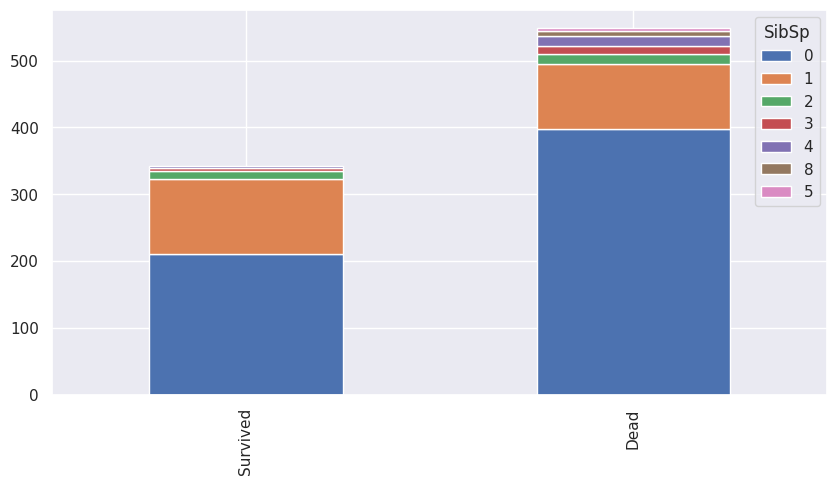

In [18]:
bar_chart('SibSp')

In [19]:
SibSp_survival_rate = train.groupby('SibSp')['Survived'].mean()
SibSp_survival_rate
# SibSp = 1Ïù∏ Í≤ΩÏö∞ ÏÉùÏ°¥Î•†Ïù¥ Í∞ÄÏû• ÎÜíÏùå
# SibSp = 5, 8Ïù∏ Í≤ΩÏö∞ ÏÉùÏ°¥Î•†Ïù¥ Í∞ÄÏû• ÎÇÆÏùå
# ÏÉùÏ°¥Î•† : 1 > 2 > 0 > 3 > 4 > 5, 8(ÏÉùÏ°¥Î•† 0)

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [20]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

#### 1.2.4 Parch(Ìï®Íªò ÌÉëÏäπÌïú Î∂ÄÎ™®, ÏûêÎÖÄ Ïàò)

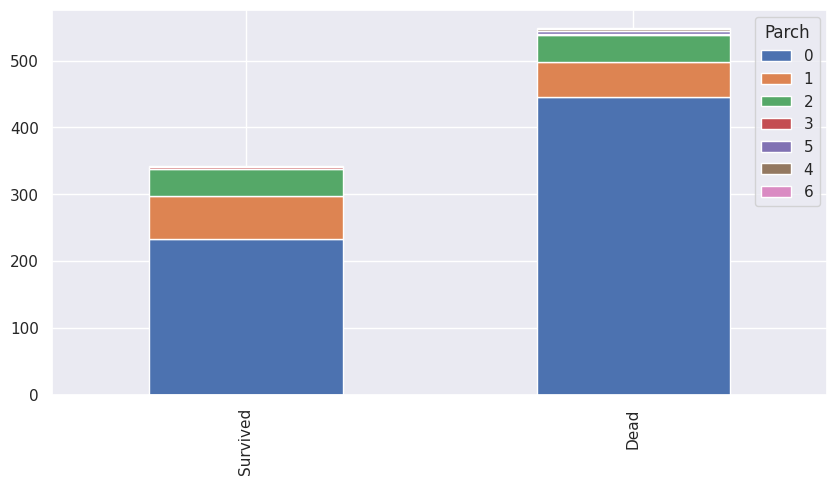

In [21]:
bar_chart('Parch')
# Parch = 0Ïù∏ Í≤ΩÏö∞ ÏÇ¨ÎßùÏûêÍ∞Ä ÎßéÏùå

In [22]:
Parch_survival_rate = train.groupby('Parch')['Survived'].mean()
Parch_survival_rate
# Parch = 3Ïù∏ Í≤ΩÏö∞ ÏÉùÏ°¥Î•†Ïù¥ Í∞ÄÏû• ÎÜíÏùå
# Parch = 4, 6Ïù∏ Í≤ΩÏö∞ ÏÉùÏ°¥Î•†Ïù¥ Í∞ÄÏû• ÎÇÆÏùå
# ÏÉùÏ°¥Î•† : 3 > 1 > 2 > 0 > 5 > 4, 6(ÏÉùÏ°¥Î•† 0)

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [23]:
train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

#### 1.2.5 Embarked

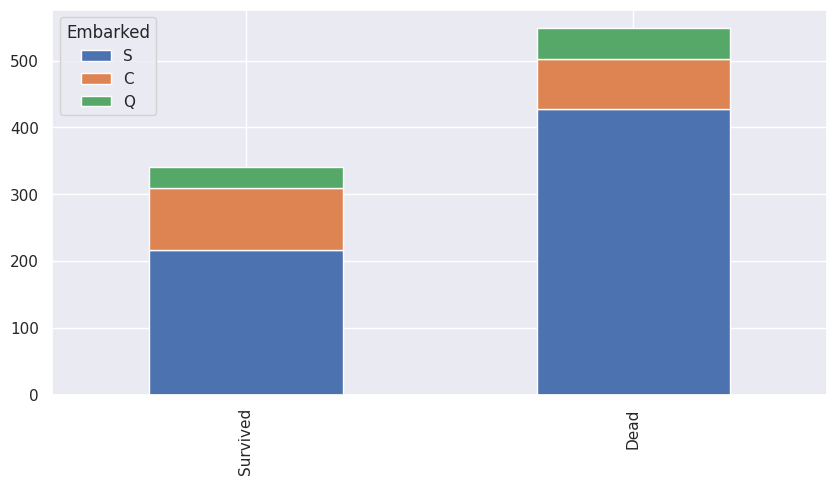

In [24]:
bar_chart('Embarked')
# Embarked = SÏù∏ Í≤ΩÏö∞ ÏÇ¨ÎßùÏûêÍ∞Ä ÎßéÏùå

In [25]:
embarked_survivla_rate = train.groupby('Embarked')['Survived'].mean()
embarked_survivla_rate

# Embarked = CÏù∏ Í≤ΩÏö∞ ÏÉùÏ°¥Î•† Í∞ÄÏû• ÎÜíÏùå
# Embarked = SÏù∏ Í≤ΩÏö∞ ÏÉùÏ°¥Î•† Í∞ÄÏû• ÎÇÆÏùå

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

# ***2. Feature engineering***

## ***2.1 Î∂àÌïÑÏöîÌïú Î≥ÄÏàò Ï†úÍ±∞***

* Cabin Í≤∞Ï∏°Ïπò ÎßéÏïÑÏÑú Ï†úÍ±∞
* PassengerId, Name, Ticket Î∂àÌïÑÏöîÌïú Î≥ÄÏàòÎùº ÌåêÎã®ÌïòÏó¨ Ï†úÍ±∞

In [26]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
train

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [28]:
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis =1)
test

Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0         3    male  34.5      0      0    7.8292        Q
1         3  female  47.0      1      0    7.0000        S
2         2    male  62.0      0      0    9.6875        Q
3         3    male  27.0      0      0    8.6625        S
4         3  female  22.0      1      1   12.2875        S
..      ...     ...   ...    ...    ...       ...      ...
413       3    male   NaN      0      0    8.0500        S
414       1  female  39.0      0      0  108.9000        C
415       3    male  38.5      0      0    7.2500        S
416       3    male   NaN      0      0    8.0500        S
417       3    male   NaN      1      1   22.3583        C

[418 rows x 7 columns]

## ***2.2 Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨***

* Ïù¥ÏÉÅÏπò ÎπÑÏú®Ïù¥ 5% Ïù¥Ìïò ‚Üí Ïù¥ÏÉÅÏπò ÏòÅÌñ•Ïù¥ ÌÅ¨ÏßÄ ÏïäÏùå (ÌèâÍ∑† ÏÇ¨Ïö© Í∞ÄÎä•)
* Ïù¥ÏÉÅÏπò ÎπÑÏú®Ïù¥ 10~15% Ïù¥ÏÉÅ ‚Üí Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÎã§Í≥† Î≥º Ïàò ÏûàÏùå (Ï§ëÏïôÍ∞í Ï∂îÏ≤ú)

In [29]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [30]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

### 2.2.1 Age Í≤∞Ï∏°Ïπò Ï†úÍ±∞(train, test)

In [31]:
# Age Î≥ÄÏàò Ïù¥ÏÉÅÏπò ÌôïÏù∏
age_q1 = train['Age'].quantile(0.25)
age_q3 = train['Age'].quantile(0.75)
age_IQR = age_q3 - age_q1

lower_bound = age_q1 - 1.5 * age_IQR
upper_bound = age_q3 + 1.5 * age_IQR

age_outliers = train[(train['Age'] < lower_bound) | (train['Age'] > upper_bound)]
print("Age Î≥ÄÏàò Ïù¥ÏÉÅÏπò Í∞úÏàò :", len(age_outliers))

Age Î≥ÄÏàò Ïù¥ÏÉÅÏπò Í∞úÏàò : 11


In [32]:
# Age Î≥ÄÏàò Ïù¥ÏÉÅÏπò ÎπÑÏú® ÌôïÏù∏
age_outliers_rate = (len(age_outliers) / len(train['Age'])) * 100
print(f"Age Î≥ÄÏàò Ïù¥ÏÉÅÏπò ÎπÑÏú® : {age_outliers_rate : .2f}%")

# Ïù¥ÏÉÅÏπò ÎπÑÏú®Ïù¥ ÎÇÆÏúºÎØÄÎ°ú Í≤∞Ï∏°ÏπòÎ•º ÏÑ±Î≥ÑÏóê Îî∞Î•∏ Age ÌèâÍ∑†ÏúºÎ°ú Ï±ÑÏõÄ

Age Î≥ÄÏàò Ïù¥ÏÉÅÏπò ÎπÑÏú® :  1.23%


In [33]:
sex_age_mean = train.groupby('Sex')['Age'].mean()
sex_age_mean

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [34]:
# train data Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
train.loc[(train['Sex'] == 'female') & (train['Age'].isnull()), 'Age'] = sex_age_mean[0]
train.loc[(train['Sex'] == 'male') & (train['Age'].isnull()), 'Age'] = sex_age_mean[1]

<ipython-input-34-2c03c9ba4242>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train.loc[(train['Sex'] == 'female') & (train['Age'].isnull()), 'Age'] = sex_age_mean[0]
<ipython-input-34-2c03c9ba4242>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train.loc[(train['Sex'] == 'male') & (train['Age'].isnull()), 'Age'] = sex_age_mean[1]


In [35]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [36]:
# train data Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
test.loc[(test['Sex'] == 'female') & (test['Age'].isnull()), 'Age'] = sex_age_mean[0]
test.loc[(test['Sex'] == 'male') & (test['Age'].isnull()), 'Age'] = sex_age_mean[1]

<ipython-input-36-bbe0034ac78e>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test.loc[(test['Sex'] == 'female') & (test['Age'].isnull()), 'Age'] = sex_age_mean[0]
<ipython-input-36-bbe0034ac78e>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test.loc[(test['Sex'] == 'male') & (test['Age'].isnull()), 'Age'] = sex_age_mean[1]


In [37]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

### 2.2.2 Embarked Í≤∞Ï∏°Ïπò Ï†úÍ±∞(train)

* train data 'Embarked' Í≤∞Ï∏°Ïπò : 2Í∞ú -> Í∞ÄÏû• ÎßéÏùÄ Í∞íÏúºÎ°ú Ï±ÑÏõÄ

In [38]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [39]:
train['Embarked'] = train['Embarked'].fillna('S')

In [40]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 2.2.3 Fare Í≤∞Ï∏°Ïπò Ï†úÍ±∞(test)

üìå test data 'Fare' Í≤∞Ï∏°Ïπò : 1Í∞ú -> Ïù¥ÏÉÅÏπò ÎπÑÏú® ÌôïÏù∏ ÌõÑ train dataÏùò 'Fare' Î≥ÄÏàò ÌèâÍ∑†Í∞í ÎòêÎäî Ï§ëÏïôÍ∞íÏúºÎ°ú Ï±ÑÏõÄ  
üìå Î™®Îç∏Ïù¥ ÌïôÏäµÌïòÎäî Í∏∞Ï§ÄÏùÄ train Îç∞Ïù¥ÌÑ∞Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê train Îç∞Ïù¥ÌÑ∞Ïùò Ïù¥ÏÉÅÏπò ÎπÑÏú®ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Î¥êÏïº Ìï®



In [41]:
# "Fare" Ïù¥ÏÉÅÏπò Í∞úÏàò ÌôïÏù∏
fare_q1 = train['Fare'].quantile(0.25)
fare_q3 = train['Fare'].quantile(0.75)

fare_IQR = fare_q3 - fare_q1

fare_lower_bound = fare_q1 - 1.5 * fare_q1
fare_upper_bound = fare_q3 + 1.5 * fare_q3

fare_outliers = train[(train['Fare'] < fare_lower_bound) | (train['Fare'] > fare_upper_bound)]
print("Fare Î≥ÄÏàò Ïù¥ÏÉÅÏπò Í∞úÏàò :", len(fare_outliers))

Fare Î≥ÄÏàò Ïù¥ÏÉÅÏπò Í∞úÏàò : 90


In [42]:
# "Fare" Ïù¥ÏÉÅÏπò ÎπÑÏú® ÌôïÏù∏
fare_outliers_rate = (len(fare_outliers) / len(train['Fare'])) * 100
print(f"Fare Î≥ÄÏàò Ïù¥ÏÉÅÏπò ÎπÑÏú® : {fare_outliers_rate : .2f}%")

# Ïù¥ÏÉÅÏπò ÎπÑÏú®Ïù¥ 10%Ïù¥ÏÉÅÏù¥ÎØÄÎ°ú Ï§ëÏïôÍ∞íÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï±ÑÏõÄ

Fare Î≥ÄÏàò Ïù¥ÏÉÅÏπò ÎπÑÏú® :  10.10%


In [43]:
test['Fare'] = test['Fare'].fillna(train['Fare'].median())

In [44]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## ***2.3 Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú Î≥ÄÍ≤Ω***


In [45]:
train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

### 2.3.1 Sex(train, test)

üìå male = 0, female = 1

In [46]:
train['Sex'] = train['Sex'].replace({'female' : 1, 'male' : 0})
test['Sex'] = test['Sex'].replace({'female' : 1, 'male' :0})

<ipython-input-46-69968b2cadfa>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Sex'] = train['Sex'].replace({'female' : 1, 'male' : 0})
<ipython-input-46-69968b2cadfa>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Sex'] = test['Sex'].replace({'female' : 1, 'male' :0})


In [47]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    0  22.0      1      0   7.2500        S
1         1       1    1  38.0      1      0  71.2833        C
2         1       3    1  26.0      0      0   7.9250        S
3         1       1    1  35.0      1      0  53.1000        S
4         0       3    0  35.0      0      0   8.0500        S

### 2.3.2 Embarked(train, test)

üìå Q = 0, C = 1, S = 2

In [48]:
train['Embarked'] = train['Embarked'].replace({'Q' : 0, 'C' : 1, 'S' : 2})
test['Embarked'] = test['Embarked'].replace({'Q' : 0, 'C' : 1, 'S' : 2})

<ipython-input-48-b44a307a87fa>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Embarked'] = train['Embarked'].replace({'Q' : 0, 'C' : 1, 'S' : 2})
<ipython-input-48-b44a307a87fa>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Embarked'] = test['Embarked'].replace({'Q' : 0, 'C' : 1, 'S' : 2})


In [49]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         2
1         1       1    1  38.0      1      0  71.2833         1
2         1       3    1  26.0      0      0   7.9250         2
3         1       1    1  35.0      1      0  53.1000         2
4         0       3    0  35.0      0      0   8.0500         2

## ***2.4 Ïó∞ÏÜçÌòï Î≥ÄÏàò Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú Î≥ÄÍ≤Ω***



### ***2.4.1 Age Î≥ÄÏàò(train, test)***

üìå Age Î≥ÄÏàò ÎπÑÎåÄÏπ≠Ï†Å Î∂ÑÌè¨(ÏôºÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨)Î•º Î≥¥ÏûÑ  
üìå Î°úÍ∑∏ Î≥ÄÌôòÏúºÎ°ú Ï†ïÍ∑úÎ∂ÑÌè¨Î°ú Î≥ÄÌôòÌïòÎ©¥ Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏó¨ Ìä∏Î¶¨Î™®Îç∏ÏùÑ Ï†úÏô∏Ìïú ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑú Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïùº Ïàò ÏûàÏùå  


<Axes: ylabel='Frequency'>

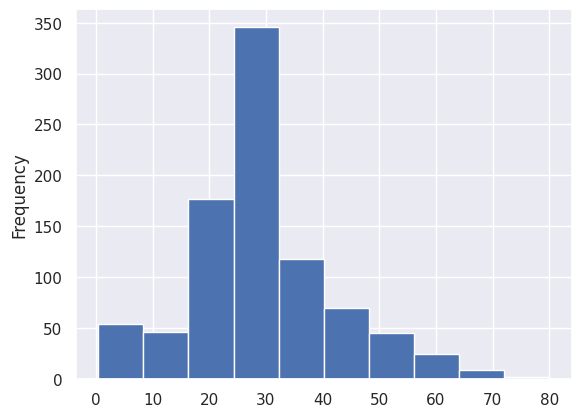

In [50]:
train['Age'].plot(kind = 'hist')

In [51]:
train['Age'].describe()

count    891.000000
mean      29.736034
std       13.014897
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [52]:
test['Age'].describe()

count    418.000000
mean      30.197890
std       12.648678
min        0.170000
25%       23.000000
50%       29.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64

üìå include_lowest=TrueÎ•º Ï∂îÍ∞ÄÌïòÎ©¥ ÏµúÏÜüÍ∞íÎèÑ Ï≤´ Î≤àÏß∏ Íµ¨Í∞ÑÏóê Ìè¨Ìï®ÎêòÎèÑÎ°ù Î≥¥Ïû•!

In [53]:
bins = [0, 22, 30, 35, 80]  # ÏµúÏÜåÍ∞í(0) ~ ÏµúÎåÄÍ∞í(80) ÏÇ¨Ïù¥Î•º 4Íµ¨Í∞ÑÏúºÎ°ú ÎÇòÎàî
labels = ['0', '1', '2', '3']  # Î≤îÏ£ºÌòï ÎùºÎ≤®

train['Age_group'] = pd.cut(train['Age'], bins=bins, labels=labels, include_lowest=True)
test['Age_group'] = pd.cut(test['Age'], bins=bins, labels=labels, include_lowest=True)

üìå train, test data Age_group ÏàòÏπòÌòï Î≥ÄÏàò ÌÉÄÏûÖ Î≥ÄÍ≤Ω

In [54]:
train['Age_group'] = train['Age_group'].astype(int)

In [55]:
test['Age_group'] = test['Age_group'].astype(int)

üìå train, test dataÏóêÏÑú Age Î≥ÄÏàò Ï†úÍ±∞

In [56]:
train = train.drop('Age', axis = 1)
train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age_group'],
      dtype='object')

In [57]:
test = test.drop('Age', axis = 1)
test.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_group'], dtype='object')

### ***2.4.2 Fare Î≥ÄÏàò(train, test)***

üìå 'Fare' Î≥ÄÏàòÏùò Í≤ΩÏö∞ Ïù¥ÏÉÅÏπò ÎπÑÏú®Ïù¥ 10.10%Ïù¥ÏóàÏúºÎØÄÎ°ú Î°úÍ∑∏ Î≥ÄÌôòÌï¥Î≥¥Îäî Í≤ÉÏùÑ Ï∂îÏ≤ú

<Axes: ylabel='Frequency'>

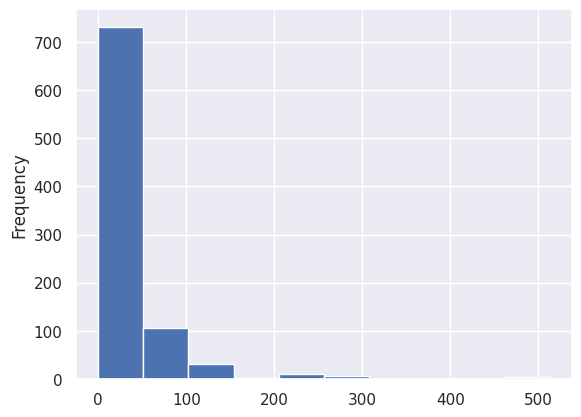

In [58]:
train['Fare'].plot(kind = 'hist')

In [59]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [60]:
# Î°úÍ∑∏ Î≥ÄÌôò (log1p ÏÇ¨Ïö©: log(1 + x)Î°ú Î≥ÄÌôòÌïòÏó¨ 0Í∞í Î¨∏Ï†ú Ìï¥Í≤∞)
train["Fare_log"] = np.log1p(train["Fare"])

<Axes: ylabel='Frequency'>

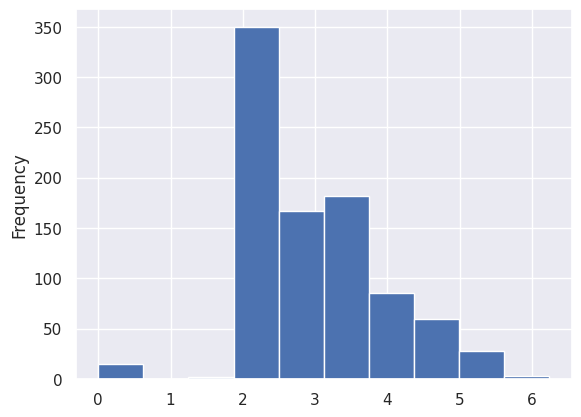

In [61]:
train['Fare_log'].plot(kind = 'hist')

In [62]:
train['Fare_log'].describe()

count    891.000000
mean       2.962246
std        0.969048
min        0.000000
25%        2.187218
50%        2.737881
75%        3.465736
max        6.240917
Name: Fare_log, dtype: float64

In [63]:
test['Fare_log'] = np.log1p(test["Fare"])
test.describe()

Pclass         Sex       SibSp       Parch        Fare    Embarked  \
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000   
mean     2.265550    0.363636    0.447368    0.392344   35.576535    1.535885   
std      0.841838    0.481622    0.896760    0.981429   55.850103    0.685516   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000    0.000000    0.000000    7.895800    1.000000   
50%      3.000000    0.000000    0.000000    0.000000   14.454200    2.000000   
75%      3.000000    1.000000    1.000000    0.000000   31.471875    2.000000   
max      3.000000    1.000000    8.000000    9.000000  512.329200    2.000000   

        Age_group    Fare_log  
count  418.000000  418.000000  
mean     1.468900    3.015421  
std      1.114646    0.966932  
min      0.000000    0.000000  
25%      1.000000    2.185579  
50%      1.000000    2.737881  
75%      2.750000    3.480373  
max      3.000000    6.240917

üìå train, test 'Fare' Î≥ÄÏàò Ï†úÍ±∞

In [64]:
train = train.drop('Fare', axis = 1)
test = test.drop('Fare', axis = 1)
train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_group',
       'Fare_log'],
      dtype='object')

In [65]:
train.loc[train['Parch'] == 3]

Survived  Pclass  Sex  SibSp  Parch  Embarked  Age_group  Fare_log
86          0       3    0      1      3         2          0  3.566005
437         1       2    1      2      3         2          1  2.983153
736         0       3    1      1      3         2          3  3.566005
774         1       2    1      1      3         2          3  3.178054
858         1       3    1      0      3         1          1  3.008565

## ***2.5 Parch, SibSp Î≥ÄÏàò ÌïòÎÇòÏùò Î≥ÄÏàòÎ°ú Ìï©ÏπòÍ∏∞(train, test)***

üìå ParchÏôÄ SibSpÎäî Í∞ÄÏ°± Íµ¨ÏÑ±Ïù¥ÎùºÎäî Í≥µÌÜµÎêú ÏùòÎØ∏Î•º Í∞ÄÏßÄÎ©∞, ÏÉÅÍ¥ÄÍ≥ÑÏàòÎèÑ 0.41 Ï†ïÎèÑÎ°ú Í¥ÄÎ†®Ïù¥ ÏûàÏúºÎØÄÎ°ú Family SizeÎ•º ÎßåÎì§Ïñ¥ Ïã§ÌóòÌï¥Î≥º Ïàò ÏûàÎã§ ‚Üí ÌÉÄÎãπÌïú Ï†ëÍ∑º

In [66]:
train.corr()

Survived    Pclass       Sex     SibSp     Parch  Embarked  \
Survived   1.000000 -0.338481  0.543351 -0.035322  0.081629 -0.106811   
Pclass    -0.338481  1.000000 -0.131900  0.083081  0.018443 -0.045702   
Sex        0.543351 -0.131900  1.000000  0.114631  0.245489 -0.116569   
SibSp     -0.035322  0.083081  0.114631  1.000000  0.414838  0.059961   
Parch      0.081629  0.018443  0.245489  0.414838  1.000000  0.078665   
Embarked  -0.106811 -0.045702 -0.116569  0.059961  0.078665  1.000000   
Age_group -0.070661 -0.299908 -0.138969 -0.168249 -0.092496 -0.000035   
Fare_log   0.329862 -0.661022  0.263276  0.318528  0.332186 -0.019588   

           Age_group  Fare_log  
Survived   -0.070661  0.329862  
Pclass     -0.299908 -0.661022  
Sex        -0.138969  0.263276  
SibSp      -0.168249  0.318528  
Parch      -0.092496  0.332186  
Embarked   -0.000035 -0.019588  
Age_group   1.000000  0.101733  
Fare_log    0.101733  1.000000

In [67]:
train['family_size'] = train['Parch'] + train['SibSp'] + 1
test['family_size'] = test['Parch'] + test['SibSp'] + 1

üìå 'Parch', 'SibSp' Î≥ÄÏàò Ï†úÍ±∞(train, test)

In [68]:
train = train.drop(['Parch','SibSp'], axis = 1)
test = test.drop(['Parch','SibSp'], axis = 1)

In [69]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Embarked', 'Age_group', 'Fare_log',
       'family_size'],
      dtype='object')

In [70]:
test.columns

Index(['Pclass', 'Sex', 'Embarked', 'Age_group', 'Fare_log', 'family_size'], dtype='object')

In [71]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Embarked       0
Age_group      0
Fare_log       0
family_size    0
dtype: int64

In [72]:
test.isnull().sum()

Pclass         0
Sex            0
Embarked       0
Age_group      0
Fare_log       0
family_size    0
dtype: int64

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Embarked     891 non-null    int64  
 4   Age_group    891 non-null    int64  
 5   Fare_log     891 non-null    float64
 6   family_size  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


# ***3. Modeling***

* Logisitic Regression Ï†ïÌôïÎèÑ : 0.8045
* KNN Ï†ïÌôïÎèÑ : 0.7877
* DT Ï†ïÌôïÎèÑ : 0.8045
* random forest Ï†ïÌôïÎèÑ : 0.8156
* SVM Ï†ïÌôïÎèÑ : 0.7877
* XGBoost Ï†ïÌôïÎèÑ : 0.8212
* GBM Ï†ïÌôïÎèÑ : 0.8156

In [78]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò Ï¢ÖÏÜçÎ≥ÄÏàò Î∂ÑÎ¶¨
features = ['Pclass', 'Sex', 'Embarked', 'Age_group', 'Fare_log','family_size']
X = train[features]
y = train['Survived']

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(712, 6)

In [ ]:
X_val.shape

(179, 6)

In [ ]:
X_train.head()

Pclass  Sex  Embarked  Age_group  Fare_log  family_size
331       1    0         2          3  3.384390            1
733       2    0         2          1  2.639057            1
382       3    0         2          2  2.188856            1
704       3    0         2          1  2.180892            2
813       3    1         2          0  3.474293            7

In [ ]:
X_val.head()

Pclass  Sex  Embarked  Age_group  Fare_log  family_size
709       3    0         1          2  2.787834            3
439       2    0         2          2  2.442347            1
840       3    0         2          0  2.188856            1
720       2    1         2          0  3.526361            2
39        3    1         1          0  2.504848            2

## ***3.1 Logsitic Regression(Ï†ïÌôïÎèÑ : 0.8045)***

‚úÖ X_trainÏóêÏÑúÎäî fit_transform()ÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº ÌïòÎäî Ïù¥Ïú†
X_trainÏóêÏÑú Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º ÌïôÏäµÌï¥Ïïº Ìï®.
Ïù¥ ÌÜµÍ≥ÑÎ•º Í∏∞Î∞òÏúºÎ°ú X_trainÏùÑ ÌëúÏ§ÄÌôîÌï¥Ïïº Ìï®.  
‚úÖ X_testÏóêÏÑúÎäî transform()Îßå ÏÇ¨Ïö©Ìï¥Ïïº ÌïòÎäî Ïù¥Ïú†
Î™®Îç∏Ïù¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º Î™®Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï¥Ïïº Ìï®!

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
# Î™®Îç∏, ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logistic = LogisticRegression()

# Î™®Îç∏ ÌïôÏäµ
logistic.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = logistic.predict(X_val)

In [ ]:
# Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
accuracy = accuracy_score(y_val, y_pred)
print(f"Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ∂ÑÏÑù Ï†ïÌôïÎèÑ : {accuracy : .4f}")

Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ∂ÑÏÑù Ï†ïÌôïÎèÑ :  0.8045


In [ ]:
# ÌòºÎèôÌñâÎ†¨, Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)

[[91 14]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## ***3.2 KNN(Ï†ïÌôïÎèÑ : 0.7877)***

In [ ]:
# Ï†ïÍ∑úÌôî
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()

# Î™®Îç∏ ÌïôÏäµ
knn.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred = knn.predict(X_val)

In [ ]:
# Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
accuracy = accuracy_score(y_val, y_pred)
print(f"KNN Ï†ïÌôïÎèÑ : {accuracy :.4f}")

KNN Ï†ïÌôïÎèÑ : 0.7877


In [ ]:
# ÌòºÎèôÌñâÎ†¨, Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)

[[86 19]
 [19 55]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



## ***3.3 Decision Tree(Ï†ïÌôïÎèÑ : 0.8045 )***

In [ ]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Î™®Îç∏ ÌïôÏäµ
dt.fit(X_train, y_train)

# Î™®Îç∏ ÏòàÏ∏°
y_pred = dt.predict(X_val)

In [ ]:
# Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_val, y_pred)
print(f"DT Ï†ïÌôïÎèÑ : {accuracy :.4f}")

DT Ï†ïÌôïÎèÑ : 0.8045


In [ ]:
# ÌòºÎèôÌñâÎ†¨, Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)

[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## ***3.4 Random Forest(Ï†ïÌôïÎèÑ : 0.8156)***

In [ ]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Î™®Îç∏ ÌïôÏäµ
rf.fit(X_train, y_train)

# Î™®Îç∏ ÏòàÏ∏°
y_pred = rf.predict(X_val)

In [ ]:
# Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_val, y_pred)
print(f"Random Forest Ï†ïÌôïÎèÑ : {accuracy :.4f}")

Random Forest Ï†ïÌôïÎèÑ : 0.8156


In [ ]:
# ÌòºÎèôÌñâÎ†¨, Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)

[[91 14]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



## ***3.5 SVM(Ï†ïÌôïÎèÑ : 0.7877)***

In [ ]:
# Ï†ïÍ∑úÌôî
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
from sklearn.svm import SVC
svc = SVC()

# Î™®Îç∏ ÌïôÏäµ
svc.fit(X_train, y_train)

# Î™®Îç∏ ÏòàÏ∏°
y_pred = svc.predict(X_val)

# Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_val, y_pred)
print(f"SVM Ï†ïÌôïÎèÑ : {accuracy :.4f}")

# ÌòºÎèôÌñâÎ†¨, Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)

SVM Ï†ïÌôïÎèÑ : 0.7877
[[94 11]
 [27 47]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       105
           1       0.81      0.64      0.71        74

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



## ***3.6 XGBoost(Ï†ïÌôïÎèÑ : 0.8212)***

In [ ]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Î™®Îç∏ ÌïôÏäµ
xgb.fit(X_train, y_train)

# Î™®Îç∏ ÏòàÏ∏°
y_pred = xgb.predict(X_val)

# Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_val, y_pred)
print(f"XGBoost Ï†ïÌôïÎèÑ : {accuracy :.4f}")

# ÌòºÎèôÌñâÎ†¨, Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)

XGBoost Ï†ïÌôïÎèÑ : 0.8212
[[90 15]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## ***3.7 GBM(Ï†ïÌôïÎèÑ : 0.8156)***

In [ ]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# Î™®Îç∏ ÌïôÏäµ
gbm.fit(X_train, y_train)

# Î™®Îç∏ ÏòàÏ∏°
y_pred = gbm.predict(X_val)

# Ï†ïÌôïÎèÑ ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_val, y_pred)
print(f"GBM Ï†ïÌôïÎèÑ : {accuracy :.4f}")

# ÌòºÎèôÌñâÎ†¨, Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)

GBM Ï†ïÌôïÎèÑ : 0.8156
[[93 12]
 [21 53]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



# ***4. Ìï¥ÏÑù Î∞è Ïù∏ÏÇ¨Ïù¥Ìä∏***
‚úÖ 1. Îç∞Ïù¥ÌÑ∞Îäî ÏôÑÏ†ÑÌûà ÏÑ†ÌòïÏ†ÅÏù¥ÏßÄ ÏïäÏùå (ÏÑ†Ìòï + ÎπÑÏÑ†Ìòï ÌòºÌï©)  
Logistic RegressionÍ≥º Decision TreeÏùò Ï†ïÌôïÎèÑÍ∞Ä Í∞ôÏùå (0.8045)
‚Üí Îç∞Ïù¥ÌÑ∞Ïóê ÏÑ†ÌòïÏ†ÅÏù∏ Í≤ΩÌñ•Ïù¥ ÏùºÎ∂Ä Ï°¥Ïû¨Ìï®ÏùÑ ÏùòÎØ∏  
Ìä∏Î¶¨ Í∏∞Î∞ò Î™®Îç∏ (Random Forest, GBM, XGBoost)Ïù¥ Îçî ÎÜíÏùÄ Ï†ïÌôïÎèÑÎ•º Î≥¥ÏûÑ
‚Üí ÎπÑÏÑ†ÌòïÏ†ÅÏù∏ Ìå®ÌÑ¥ÎèÑ Ï°¥Ïû¨ÌïòÎ©∞, Ìä∏Î¶¨ Î™®Îç∏Ïù¥ Ïù¥Î•º Ïûò Ïû°ÏïÑÎÇ¥Í≥† ÏûàÏùå  
‚Üí Ï¶â, Îç∞Ïù¥ÌÑ∞Îäî ÏÑ†Ìòï + ÎπÑÏÑ†Ìòï ÏöîÏÜåÍ∞Ä ÏÑûÏù∏ Íµ¨Ï°∞

‚úÖ 2. KNN, SVM ÎÇÆÏùÄ ÏÑ±Îä•
-> Í±∞Î¶¨ Í∏∞Î∞ò(knn)Í≥º Ïª§ÎÑê Í∏∞Î∞ò(svm) Î∞©ÏãùÏù¥ Îç∞Ïù¥ÌÑ∞ÏôÄ Ïûò ÎßûÏßÄ ÏïäÏùå  
   

üöÄ ÏµúÏ¢Ö Í≤∞Î°† Î∞è Ï∂îÏ≤ú Ï†ÑÎûµ
1. XGBoostÍ∞Ä Í∞ÄÏû• Ï†ÅÌï©Ìïú Î™®Îç∏  
2. Ìä∏Î¶¨ Í∏∞Î∞ò Î™®Îç∏Ïù¥ Ìö®Í≥ºÏ†ÅÏù¥ÎØÄÎ°ú, Î∂ÄÏä§ÌåÖ Î™®Îç∏ÏùÑ ÏµúÏ†ÅÌôîÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöî  
3. KNNÍ≥º SVMÏùÄ ÎπÑÌö®Ïú®Ï†ÅÏù¥ÎØÄÎ°ú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî Í≤ÉÏù¥ Ï¢ãÏùå


# ***5. XGBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù***

## ***5.1 XGBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù***
üìå ÎûúÎç§ ÏÑúÏπò -> ÏôÑÏ†Ñ Í∑∏Î¶¨Îìú ÏÑúÏπò  
üìå model = XGBClassifier(n_estimators = 100, learning_rate = 0.3, max_depth = 6, subsample = 1.0, colsample_bytree = 1.0, gamma = 0)  
üìå Î¨¥Ï°∞Í±¥ Í∑∏Î¶¨Îìú ÏÑúÏπòÎ•º Îçî ÌïòÎäî Í≤ÉÏù¥ ÏïÑÎãàÎùº, Ï†ïÎ∞Ä Ï°∞Ï†ï(Fine-tuning)Ïù¥ ÌïÑÏöîÌï®.
learning_rate, max_depth, gamma, n_estimators Í∞ôÏùÄ ÌïµÏã¨ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï¢ÅÏùÄ Î≤îÏúÑÏóêÏÑú ÎØ∏ÏÑ∏ Ï°∞Ï†ïÌïòÎäî Í≤ÉÏù¥ Ìö®Í≥ºÏ†Å. ÏôÑÏ†Ñ Í∑∏Î¶¨Îìú ÏÑúÏπò ÎπÑÌö®Ïú®Ï†ÅÏùº Ïàò ÏûàÏùå

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

# XGBoost Î™®Îç∏ ÏÉùÏÑ± (Í∏∞Î≥∏ ÏÑ§Ï†ï)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# ======================================
# 1. RandomizedSearchCVÎ°ú ÎåÄÎûµÏ†ÅÏù∏ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ ÌÉêÏÉâ
# ======================================
param_dist = {
    "n_estimators": np.arange(50, 400, 50),              # 50, 100, 150, ... 350
    "learning_rate": np.linspace(0.001, 0.5, 10),       # 10Í∞ÄÏßÄ Í∞í
    "max_depth": np.arange(3, 10, 1),                   # 3,4,5,6,7,8,9
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],       # Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ ÎπÑÏú®
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # ÌäπÏÑ± ÏÉòÌîåÎßÅ ÎπÑÏú®
    "gamma": [0, 0.1, 0.2, 0.3, 0.5, 1.0],             # Î∂ÑÌï† ÏµúÏÜå ÏÜêÏã§ Í∞êÏÜå
    "reg_lambda": [0, 0.1, 0.5, 1.0, 5.0],             # L2 Ï†ïÍ∑úÌôî
    "reg_alpha": [0, 0.1, 0.5, 1.0, 5.0]               # L1 Ï†ïÍ∑úÌôî
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,           # 50Î≤àÏùò ÎûúÎç§ ÏÉòÌîåÎßÅ
    cv=5,                # 5-fold ÍµêÏ∞® Í≤ÄÏ¶ù
    scoring='accuracy',  # Ï†ïÌôïÎèÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌèâÍ∞Ä (ÏõêÌïòÎäî ÌèâÍ∞Ä ÏßÄÌëúÎ°ú Î≥ÄÍ≤Ω Í∞ÄÎä•)
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

# ‚úÖ ÎûúÎç§ ÏÑúÏπò Í≤∞Í≥º Ï†ïÎ¶¨ Î∞è Ï∂úÎ†•
results_df = pd.DataFrame(random_search.cv_results_)[['mean_test_score', 'params']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)
print("\nüîπ Random Search Í≤∞Í≥º (ÏÉÅÏúÑ 5Í∞ú):\n", results_df.head())

# ‚úÖ ÎûúÎç§ ÏÑúÏπò ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÇ¨Ïö©
best_params = random_search.best_params_
print("\n‚úÖ ÎûúÎç§ ÏÑúÏπò ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞:", best_params)
print("‚úÖ ÎûúÎç§ ÏÑúÏπò ÏµúÍ≥† Ï†ïÌôïÎèÑ:", random_search.best_score_)


üîπ Random Search Í≤∞Í≥º (ÏÉÅÏúÑ 5Í∞ú):
     mean_test_score                                             params
45         0.824407  {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alp...
22         0.823008  {'subsample': 0.9, 'reg_lambda': 1.0, 'reg_alp...
24         0.818783  {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha...
9          0.817394  {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha...
7          0.817394  {'subsample': 0.9, 'reg_lambda': 0.5, 'reg_alp...

‚úÖ ÎûúÎç§ ÏÑúÏπò ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞: {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.05644444444444444, 'gamma': 1.0, 'colsample_bytree': 1.0}
‚úÖ ÎûúÎç§ ÏÑúÏπò ÏµúÍ≥† Ï†ïÌôïÎèÑ: 0.8244065793361568


In [ ]:
# Random Search Í≤∞Í≥º DataFrameÏóêÏÑú ÏÉÅÏúÑ 5Í∞ú ÌååÎùºÎØ∏ÌÑ∞ ÏÉÅÏÑ∏ Ï∂úÎ†•
top_n = 5  # ÏÉÅÏúÑ NÍ∞ú Í≤∞Í≥º Ï∂úÎ†•
for i, row in results_df.head(top_n).iterrows():
    print(f"\n {i+1} - Ï†ïÌôïÎèÑ: {row['mean_test_score']:.6f}")
    print(f"  ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {row['params']}")


 46 - Ï†ïÌôïÎèÑ: 0.824407
  ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.05644444444444444, 'gamma': 1.0, 'colsample_bytree': 1.0}

 23 - Ï†ïÌôïÎèÑ: 0.823008
  ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'subsample': 0.9, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.05644444444444444, 'gamma': 1.0, 'colsample_bytree': 0.7}

 25 - Ï†ïÌôïÎèÑ: 0.818783
  ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 5.0, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.5, 'gamma': 0, 'colsample_bytree': 0.8}

 10 - Ï†ïÌôïÎèÑ: 0.817394
  ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 5.0, 'n_estimators': 350, 'max_depth': 6, 'learning_rate': 0.22277777777777777, 'gamma': 0.3, 'colsample_bytree': 0.7}

 8 - Ï†ïÌôïÎèÑ: 0.817394
  ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'subsample': 0.9, 'reg_lambda': 0.5, 'reg_alpha': 1.0, 'n_estimators': 100, 'max_d

In [ ]:
k# 2. GridSearchCVÎ°ú ÎØ∏ÏÑ∏ Ï°∞Ï†ï (ÏµúÏ†ÅÍ∞í Ï§ëÏã¨)
# ======================================
# ÏµúÏ†ÅÍ∞íÏùÑ Ï§ëÏã¨ÏúºÎ°ú Ï¢ÅÏùÄ Î≤îÏúÑÏùò Í∑∏Î¶¨Îìú ÏÑúÏπò ÏàòÌñâ
param_grid = {
    'learning_rate': [best_params['learning_rate'] * 0.8, best_params['learning_rate'], best_params['learning_rate'] * 1.2],
    'max_depth': [best_params['max_depth'] - 1, best_params['max_depth'], best_params['max_depth'] + 1],
    'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
    'gamma': [best_params['gamma'] * 0.8, best_params['gamma'], best_params['gamma'] * 1.2]
}

# XGBoost Î™®Îç∏ Ï¥àÍ∏∞Ìôî (ÎûúÎç§ ÏÑúÏπò ÏµúÏ†ÅÍ∞í Ï†ÅÏö©)
model = XGBClassifier(
    subsample=best_params['subsample'],
    reg_lambda=best_params['reg_lambda'],
    reg_alpha=best_params['reg_alpha'],
    colsample_bytree=best_params['colsample_bytree'],
    eval_metric='logloss'
)

# GridSearchCV Ïã§Ìñâ
grid_search = GridSearchCV(
    model, param_grid,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("\n Í∑∏Î¶¨Îìú ÏÑúÏπò ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", grid_search.best_params_)
print(" Í∑∏Î¶¨Îìú ÏÑúÏπò ÏµúÍ≥† Ï†ïÌôïÎèÑ:", grid_search.best_score_)

#  ÏµúÏ†Å Î™®Îç∏Î°ú Í≤ÄÏ¶ù ÏÑ∏Ìä∏ ÌèâÍ∞Ä
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("\n Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ:", accuracy)

Fitting 5 folds for each of 81 candidates, totalling 405 fits

 Í∑∏Î¶¨Îìú ÏÑúÏπò ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'gamma': 1.0, 'learning_rate': 0.05644444444444444, 'max_depth': 10, 'n_estimators': 250}
 Í∑∏Î¶¨Îìú ÏÑúÏπò ÏµúÍ≥† Ï†ïÌôïÎèÑ: 0.8188220230473752

 Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ: 0.8156424581005587


## ***5.2 XGBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù -> Ìï¥Îãπ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÏµúÏ†ÅÏùº Í≤É Í∞ôÏùå***
üìå ÎûúÎç§ ÏÑúÏπò -> ÎØ∏ÏÑ∏Ï°∞Ï†ï Í∑∏Î¶¨Îìú ÏÑúÏπò

üìå Í∑∏Î¶¨Îìú ÏÑúÏπò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ  
* learning_rate: 0.05 ~ 0.06 (0.05 Îã®ÏúÑ) learning_rateÍ∞Ä 0.0564 Í∑ºÏ≤òÏóêÏÑú ÏµúÏ†ÅÏù¥ÏóàÏúºÎØÄÎ°ú, 0.05~0.06 ÏÇ¨Ïù¥ÏóêÏÑú ÏÑ∏Î∞ÄÌïòÍ≤å ÌÉêÏÉâ, ÌõÑÎ≥¥Í∞í: [0.05, 0.055, 0.06]  \\
*
max_depth: 7 ~ 9 (1 Îã®ÏúÑ) ÌòÑÏû¨ ÏµúÏ†ÅÍ∞íÏù¥ 8 ÎòêÎäî 9Ïù∏ Í≤ΩÏö∞Í∞Ä ÎßéÏúºÎØÄÎ°ú, 7~9 ÏÇ¨Ïù¥ÏóêÏÑú ÏµúÏ†ÅÍ∞í ÌÉêÏÉâ, ÌõÑÎ≥¥Í∞í: [7, 8, 9]  \\

* n_estimators: 200 ~ 250 (1 Îã®ÏúÑ) Î≥¥ÌÜµ 50 Îã®ÏúÑÎ°ú ÌäúÎãùÌïòÎäîÎç∞, 1 Îã®ÏúÑÎ°ú ÌïòÎ©¥ Í≥ÑÏÇ∞ÎüâÏù¥ ÎÑàÎ¨¥ ÎßéÏùÑ ÏàòÎèÑ ÏûàÏùå.
ÎßåÏïΩ ÏÑ∏Î∞ÄÌïòÍ≤å ÌïòÍ≥† Ïã∂Îã§Î©¥ [200, 210, 220, 230, 240, 250]ÏúºÎ°ú ÏÑ§Ï†ï Í∞ÄÎä•  \\

* gamma: 0.5 ~ 1.0 (0.1 Îã®ÏúÑ) gammaÍ∞Ä 1.0 Í∑ºÏ≤òÏóêÏÑú ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÏúºÎØÄÎ°ú, 0.5~1.0 ÏÇ¨Ïù¥ ÌÉêÏÉâ, ÌõÑÎ≥¥Í∞í: [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# ‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ ÏÑ§Ï†ï
param_grid = {
    'learning_rate': [0.05, 0.055, 0.06],
    'max_depth': [7, 8, 9],
    'n_estimators': [200, 210, 220, 230, 240, 250],  # ÎÑàÎ¨¥ ÎßéÏúºÎ©¥ 200~250 (10Îã®ÏúÑ)Î°ú Ï°∞Ï†ï Í∞ÄÎä•
    'gamma': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

# ‚úÖ XGBoost Î™®Îç∏ Ï¥àÍ∏∞Ìôî (ÎûúÎç§ ÏÑúÏπò ÏµúÏ†ÅÍ∞í Í∏∞Î∞ò)
model = XGBClassifier(
    subsample=0.7,  # ÏµúÏ†ÅÍ∞í Í≥†Ï†ï
    reg_lambda=0.5,
    reg_alpha=0.1,
    colsample_bytree=1.0,
    eval_metric='logloss'
)

# ‚úÖ GridSearchCV Ïã§Ìñâ (StratifiedKFold ÏÇ¨Ïö©)
grid_search = GridSearchCV(
    model, param_grid,
    scoring='accuracy',
    cv=5,  # K-Fold ÍµêÏ∞® Í≤ÄÏ¶ù
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# ‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("\n‚úÖ Í∑∏Î¶¨Îìú ÏÑúÏπò ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", grid_search.best_params_)
print("‚úÖ Í∑∏Î¶¨Îìú ÏÑúÏπò ÏµúÍ≥† Ï†ïÌôïÎèÑ:", grid_search.best_score_)

# ‚úÖ ÏµúÏ†Å Î™®Îç∏Î°ú Í≤ÄÏ¶ù ÏÑ∏Ìä∏ ÌèâÍ∞Ä
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("\n‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ:", accuracy)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits

‚úÖ Í∑∏Î¶¨Îìú ÏÑúÏπò ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'gamma': 1.0, 'learning_rate': 0.06, 'max_depth': 9, 'n_estimators': 250}
‚úÖ Í∑∏Î¶¨Îìú ÏÑúÏπò ÏµúÍ≥† Ï†ïÌôïÎèÑ: 0.8159952723333006

‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ: 0.8156424581005587


## ***5.3 XGBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù***
üìå ÎûúÎç§ ÏÑúÏπò -> ÎØ∏ÏÑ∏Ï°∞Ï†ï Í∑∏Î¶¨Îìú ÏÑúÏπò  
üìå Ïù¥Ï†ÑÎ≥¥Îã§ Î™®Îç∏ Í∞úÏàòÍ∞Ä ÎäòÏóàÏßÄÎßå Ï†ïÌôïÎèÑÍ∞Ä Îñ®Ïñ¥Ïßê -> Îçî Ïù¥ÏÉÅ ÎØ∏ÏÑ∏ Ï°∞Ï†ï ÏùòÎØ∏ ÏóÜÏùå

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# ‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ ÏÑ§Ï†ï
param_grid = {
    'learning_rate': [0.054, 0.056, 0.058, 0.06, 0.062],  # üîç Í∏∞Ï°¥ ÏµúÏ†Å Î≤îÏúÑ Ï§ëÏã¨ÏúºÎ°ú ÎØ∏ÏÑ∏ Ï°∞Ï†ï
    'max_depth': [8, 9, 10],  # ‚úÖ max_depth=9Í∞Ä ÏµúÏ†ÅÏùº Í∞ÄÎä•ÏÑ± ÌÅ¨ÏßÄÎßå, Ìïú Îã®Í≥Ñ ÏúÑÏïÑÎûò ÌôïÏù∏
    'n_estimators': [230, 240, 250, 260, 270]  # üîç ÎÑàÎ¨¥ Ï¥òÏ¥òÌïú 1 Îã®ÏúÑ ÎåÄÏã† 10 Îã®ÏúÑ Ï°∞Ï†ï
}

# ‚úÖ XGBoost Î™®Îç∏ Ï¥àÍ∏∞Ìôî (ÎûúÎç§ ÏÑúÏπò ÏµúÏ†ÅÍ∞í Í∏∞Î∞ò)
model = XGBClassifier(
    subsample=0.7,  # ÏµúÏ†ÅÍ∞í Í≥†Ï†ï
    reg_lambda=0.5,
    gamma = 1.0,
    reg_alpha=0.1,
    colsample_bytree=1.0,
    eval_metric='logloss'
)

# ‚úÖ GridSearchCV Ïã§Ìñâ (StratifiedKFold ÏÇ¨Ïö©)
grid_search = GridSearchCV(
    model, param_grid,
    scoring='accuracy',
    cv=5,  # K-Fold ÍµêÏ∞® Í≤ÄÏ¶ù
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# ‚úÖ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("\n‚úÖ Í∑∏Î¶¨Îìú ÏÑúÏπò ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", grid_search.best_params_)
print("‚úÖ Í∑∏Î¶¨Îìú ÏÑúÏπò ÏµúÍ≥† Ï†ïÌôïÎèÑ:", grid_search.best_score_)

# ‚úÖ ÏµúÏ†Å Î™®Îç∏Î°ú Í≤ÄÏ¶ù ÏÑ∏Ìä∏ ÌèâÍ∞Ä
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("\n‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ:", accuracy)


Fitting 5 folds for each of 75 candidates, totalling 375 fits

‚úÖ Í∑∏Î¶¨Îìú ÏÑúÏπò ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'learning_rate': 0.06, 'max_depth': 9, 'n_estimators': 270}
‚úÖ Í∑∏Î¶¨Îìú ÏÑúÏπò ÏµúÍ≥† Ï†ïÌôïÎèÑ: 0.8188023244361272

‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ: 0.8100558659217877


# ***6. Random Forest ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù***

## ***6.1 Random Forest ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

# Î™®Îç∏ ÏÑ§Ï†ï
rf = RandomForestClassifier()

# Random Search
param_dist = {
    'n_estimators' : np.arange(100, 500, 50),
    'max_depth' : np.arange(3, 20, 2),
    'min_samples_split' : np.arange(2, 10, 1),
    'min_samples_leaf' : np.arange(1, 5, 1),
    'bootstrap' : [True, False]
}

random_search = RandomizedSearchCV(
    estimator = rf,
    param_distributions = param_dist,
    n_iter = 50,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    random_state = 42
)

random_search.fit(X_train, y_train)

# ÎûúÎç§ ÏÑúÏπò Í≤∞Í≥º Ï∂úÎ†•
result_df = pd.DataFrame(random_search.cv_results_)[['mean_test_score', 'params']]
result_df = result_df.sort_values(by = 'mean_test_score', ascending = False)
print("\n Random Search Í≤∞Í≥º(ÏÉÅÏúÑ 5Í∞ú):\n", result_df.head())

# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
best_params = random_search.best_params_
print("\n ÎûúÎç§ ÏÑúÏπò ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞:", best_params)
print("ÎûúÎç§ ÏÑúÏπò ÏµúÍ≥†Ïùò Ï†ïÌôïÎèÑ", random_search.best_score_)


 Random Search Í≤∞Í≥º(ÏÉÅÏúÑ 5Í∞ú):
     mean_test_score                                             params
45         0.820181  {'n_estimators': 450, 'min_samples_split': 5, ...
27         0.818783  {'n_estimators': 250, 'min_samples_split': 5, ...
0          0.817384  {'n_estimators': 100, 'min_samples_split': 7, ...
37         0.817364  {'n_estimators': 100, 'min_samples_split': 7, ...
25         0.817364  {'n_estimators': 350, 'min_samples_split': 5, ...

 ÎûúÎç§ ÏÑúÏπò ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞: {'n_estimators': 450, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': False}
ÎûúÎç§ ÏÑúÏπò ÏµúÍ≥†Ïùò Ï†ïÌôïÎèÑ 0.8201812272234807


In [ ]:
# Random Search Í≤∞Í≥º DataFrameÏóêÏÑú ÏÉÅÏúÑ 5Í∞ú ÌååÎùºÎØ∏ÌÑ∞ ÏÉÅÏÑ∏ Ï∂úÎ†•
top_n = 5  # ÏÉÅÏúÑ NÍ∞ú Í≤∞Í≥º Ï∂úÎ†•
for i, row in result_df.head(top_n).iterrows():
    print(f"\n {i+1} - Ï†ïÌôïÎèÑ: {row['mean_test_score']:.6f}")
    print(f"  ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {row['params']}")


 46 - Ï†ïÌôïÎèÑ: 0.820181
  ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'n_estimators': 450, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': False}

 28 - Ï†ïÌôïÎèÑ: 0.818783
  ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': False}

 1 - Ï†ïÌôïÎèÑ: 0.817384
  ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_depth': 13, 'bootstrap': True}

 38 - Ï†ïÌôïÎèÑ: 0.817364
  ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 5, 'bootstrap': True}

 26 - Ï†ïÌôïÎèÑ: 0.817364
  ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'n_estimators': 350, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': False}


In [ ]:
# Random Search Í∏∞Î∞òÏúºÎ°ú Grid Search
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ ÏÑ§Ï†ï
param_grid = {
    'n_estimators' : np.arange(240, 460, 5),
    'min_samples_split' : np.arange(4, 8, 1),
    'min_samples_leaf' : np.arange(2, 5, 1),
    'max_depth' : np.arange(4, 13, 1),
    'bootstrap' : [True, False]
}

# Grid Search Ïã§Ìñâ
grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    scoring = 'accuracy',
    cv = 5,
    verbose = 2,
    n_jobs = -1
)

# ÌïôÏäµ ÏßÑÌñâ
grid_search.fit(X_train, y_train)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("Í∑∏Î¶¨Îìú ÏÑúÏπò ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ :", grid_search.best_params_)
print("Í∑∏Î¶¨Îìú ÏÑúÏπò ÏµúÍ≥†Ïùò Ï†ïÌôïÎèÑ:", grid_search.best_score_)

# ÏµúÏ†Å Î™®Îç∏Î°ú Í≤ÄÏ¶ù ÏÑ∏Ìä∏ ÌèâÍ∞Ä
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ: {accuracy :.4f}")

Fitting 5 folds for each of 9504 candidates, totalling 47520 fits
